<a href="https://colab.research.google.com/github/subhajitchatterjee07/toy-BERT/blob/main/BERT_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from dataclasses import dataclass

In [2]:
@dataclass
class BERTConfig:
  enc_layers = 6
  head_count = 12
  emb_size = 384 # from 12
  seq_len = 36
  drop_rate = 0.1

In [3]:
#step 1 : get the data

!wget -O input.txt https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2025-01-05 08:56:02--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.06s   

2025-01-05 08:56:02 (17.2 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [4]:
with open('input.txt', 'r') as f:
  data = f.read()

print(len(data))

1115394


In [5]:
print(data[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [6]:
lines = data.splitlines()
lines[:10]

['First Citizen:',
 'Before we proceed any further, hear me speak.',
 '',
 'All:',
 'Speak, speak.',
 '',
 'First Citizen:',
 'You are all resolved rather to die than to famish?',
 '',
 'All:']

In [7]:
print(len(lines))

40000


In [8]:
# for elem in lines:
#   if elem == '':
#     lines.remove(elem) NOT A GOOD PRACTICE TO CHANGE THE ARRAY YOU ARE ITSELF WORKING ON !!

no_sp_lines = []
for elem in lines:
  if elem != '':
    no_sp_lines.append(elem)
  else:
    continue

In [9]:
print(len(no_sp_lines))

32777


In [10]:
no_sp_lines[:5]

['First Citizen:',
 'Before we proceed any further, hear me speak.',
 'All:',
 'Speak, speak.',
 'First Citizen:']

In [11]:

cat_lines = []
i = 0

while i < len(no_sp_lines):
    if no_sp_lines[i].endswith(':'):
        x = no_sp_lines[i] + ' ' + no_sp_lines[i + 1]
        cat_lines.append(x)
        i += 2
    else:
        cat_lines.append(no_sp_lines[i])
        i += 1

In [12]:
cat_lines[:30]

['First Citizen: Before we proceed any further, hear me speak.',
 'All: Speak, speak.',
 'First Citizen: You are all resolved rather to die than to famish?',
 'All: Resolved. resolved.',
 'First Citizen: First, you know Caius Marcius is chief enemy to the people.',
 "All: We know't, we know't.",
 "First Citizen: Let us kill him, and we'll have corn at our own price.",
 "Is't a verdict?",
 "All: No more talking on't; let it be done: away, away!",
 'Second Citizen: One word, good citizens.',
 'First Citizen: We are accounted poor citizens, the patricians good.',
 'What authority surfeits on would relieve us: if they',
 'would yield us but the superfluity, while it were',
 'wholesome, we might guess they relieved us humanely;',
 'but they think we are too dear: the leanness that',
 'afflicts us, the object of our misery, is as an',
 'inventory to particularise their abundance; our',
 'sufferance is a gain to them Let us revenge this with',
 'our pikes, ere we become rakes: for the gods kn

In [13]:
len(cat_lines)

24618

In [14]:
print(len(max(cat_lines, key=len)))

113


In [15]:
# WE GOTTA TOKENIZE
from transformers import BertTokenizer

# Load the pretrained tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Special tokens
print("Special Tokens:")
print("CLS:", tokenizer.cls_token)
print("SEP:", tokenizer.sep_token)
print("PAD:", tokenizer.pad_token)
print("MASK:", tokenizer.mask_token)
print("UNK:", tokenizer.unk_token)


sentence = "To be, or not to be."
encoded = tokenizer.encode(sentence, add_special_tokens=True)

print("\nEncoded with special tokens:", encoded)
print("Decoded back:", tokenizer.decode(encoded))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Special Tokens:
CLS: [CLS]
SEP: [SEP]
PAD: [PAD]
MASK: [MASK]
UNK: [UNK]

Encoded with special tokens: [101, 2000, 2022, 1010, 2030, 2025, 2000, 2022, 1012, 102]
Decoded back: [CLS] to be, or not to be. [SEP]


In [16]:
test_encoded = tokenizer(
    cat_lines,
    padding='max_length',
    #truncation=True,
    max_length=36,
    return_tensors="pt"
)

# for elem in test_encoded['input_ids']:
#   print(elem)
# for elem in test_encoded['attention_mask']:
#   print(elem)

In [17]:
for elem in test_encoded:
  print(elem)

input_ids
token_type_ids
attention_mask


In [18]:
print(tokenizer.batch_decode(test_encoded['input_ids'][0]))

['[CLS]', 'first', 'citizen', ':', 'before', 'we', 'proceed', 'any', 'further', ',', 'hear', 'me', 'speak', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [19]:
len(test_encoded['input_ids'][0])

36

In [20]:
print(tokenizer.model_max_length)


512


In [21]:
print([len(seq) for seq in test_encoded['input_ids']])


[36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36,

In [22]:
test_encoded['input_ids'][0]

tensor([  101,  2034,  6926,  1024,  2077,  2057, 10838,  2151,  2582,  1010,
         2963,  2033,  3713,  1012,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0])

In [23]:
for i, elem in enumerate(test_encoded['input_ids']):
  if elem[-1] != 0:
    print(elem, i)

tensor([  101,  2033, 29049,  2015,  1012,  8040,  3126, 10736, 14161, 10696,
          999, 11839,  2017,  1010,  2909,  1010,  1037,  2773,  1024,  1998,
         2004,  1045,  2409,  2017,  1010,  2026,  2402,  3203,  2919,  2063,
         2033,  1999, 15549,  2890,  2017,   102]) 10883


In [24]:
# Prepare data for MLM
# To create a dataset we know that 15% of the tokens in each sequence is masked at random
# of these 15% tokens, 80% are masked using the mask token [MASK]
# 10% are used in the same place unchanged, and rest 10% are replaced by a random word
# The caveat is that I will need to store the correct data along with the masked data to compare their embeddings during loss calculation
# So better prepare functions

In [25]:
tokenizer.all_special_ids

[100, 102, 0, 101, 103]

In [26]:
tokenizer.vocab_size

30522

In [27]:
import random

# This function is supposed to mask words for MLM
def masker(encoded_text):
    masking_prob = 0.15
    masked_input_ids = encoded_text.clone()  # Make sure we don't modify the original tensor
    labels = encoded_text.clone()  # Same for labels

    for i in range(len(encoded_text)):
        if random.random() < masking_prob and masked_input_ids[i] not in tokenizer.all_special_ids:
            # Replace with [MASK] 80% of the time
            if random.random() < 0.8:
                masked_input_ids[i] = tokenizer.mask_token_id
            # Replace with a random token 10% of the time
            elif random.random() < 0.9:
                masked_input_ids[i] = random.randint(0, tokenizer.vocab_size - 1)
            # Keep the original word 10% of the time
            else:
                continue

    # Set the labels to -100 for the positions that were masked
    #labels[masked_input_ids == tokenizer.mask_token_id] = -100
    return masked_input_ids, labels


In [28]:
#creating embeddings
import torch
#position_embeddings
token_embedding_layer = torch.nn.Embedding(tokenizer.vocab_size, BERTConfig.emb_size)
#print(embedding_layer(torch.tensor([3])))


In [29]:
#print(token_embedding_layer(test_encoded['input_ids'][0]))

In [30]:
print(token_embedding_layer(test_encoded['input_ids'][0]).shape)

torch.Size([36, 384])


In [31]:
test_encoded['input_ids'][0]

tensor([  101,  2034,  6926,  1024,  2077,  2057, 10838,  2151,  2582,  1010,
         2963,  2033,  3713,  1012,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0])

In [32]:
pos_embedding_layer = torch.nn.Embedding(BERTConfig.seq_len, BERTConfig.emb_size)
print(pos_embedding_layer.weight.size())

torch.Size([36, 384])


In [33]:
seg_embedding_layer = torch.nn.Embedding(2, BERTConfig.emb_size)
#print(seg_embedding_layer(torch.tensor([0])))

In [34]:
#print(seg_embedding_layer(torch.tensor([1])))

In [35]:
# Okay we got our embeddings, now we need to build Bidirectional Attention Mechanism

class BidirectionalSelfAttention(torch.nn.Module):
  def __init__(self):
    super().__init__()
    # We begin by initializing trainable params for query, key, and value
    self.W_query = torch.nn.Linear(BERTConfig.emb_size, BERTConfig.emb_size, bias=False)
    self.W_key = torch.nn.Linear(BERTConfig.emb_size, BERTConfig.emb_size, bias=False)
    self.W_value = torch.nn.Linear(BERTConfig.emb_size, BERTConfig.emb_size, bias=False)

  def forward(self, x):
    query = self.W_query(x)
    key = self.W_key(x)
    value = self.W_value(x)
    attention_scores = query @ key.T
    #print(f"attention scores size {attention_scores.shape}")
    attention_weights = torch.softmax(attention_scores / key.shape[-1]**0.5, dim=-1)
    #print(f"Attention weights size {attention_weights.shape}")
    context_vector = attention_weights @ value
    #print(f"Context vector size {context_vector.shape}")
    return context_vector


In [36]:
class MultiHeadAttention(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.num_heads = BERTConfig.head_count
    assert BERTConfig.emb_size % self.num_heads == 0, "emb_size must be divisible by num_head"
    self.head_dim = BERTConfig.emb_size // self.num_heads
    self.W_query = torch.nn.Linear(BERTConfig.emb_size, BERTConfig.emb_size, bias=False)
    self.W_key = torch.nn.Linear(BERTConfig.emb_size, BERTConfig.emb_size, bias=False)
    self.W_value = torch.nn.Linear(BERTConfig.emb_size, BERTConfig.emb_size, bias=False)
    self.out_proj = torch.nn.Linear(BERTConfig.emb_size, BERTConfig.emb_size, bias=False)
    self.dropout = torch.nn.Dropout(BERTConfig.drop_rate)

  def forward(self, x):
    b, num_tokens, d_in = x.shape
    keys = self.W_key(x)
    queries = self.W_query(x)
    values = self.W_value(x)
    keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
    values = values.view(b, num_tokens, self.num_heads, self.head_dim)
    queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)
    keys = keys.transpose(1, 2)
    queries = queries.transpose(1, 2)
    values = values.transpose(1, 2)
    attn_scores = queries @ keys.transpose(2, 3)
    attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
    attn_weights = self.dropout(attn_weights)
    context_vec = (attn_weights @ values).transpose(1, 2)
    context_vec = context_vec.contiguous().view(b, num_tokens, BERTConfig.emb_size)
    context_vec = self.out_proj(context_vec) #K
    return context_vec

In [37]:
# Get embeddings for both examples
embedding_0 = token_embedding_layer(test_encoded['input_ids'][0])
embedding_1 = token_embedding_layer(test_encoded['input_ids'][1])

# Stack them along the first dimension (batch dimension)
batch = torch.stack([embedding_0, embedding_1], dim=0)
print(batch.shape)


torch.Size([2, 36, 384])


In [38]:
att = MultiHeadAttention()
context_vector = att.forward(batch)
print(context_vector.shape)
# it works imo !!

torch.Size([2, 36, 384])


In [39]:
# # Adding a new dimension at the start (for batch size)
# x = token_embedding_layer(test_encoded['input_ids'][0]).unsqueeze(0)
# print(x.shape)


In [40]:
class LayerNorm(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.eps = 1e-5
    self.emb_dim = BERTConfig.emb_size
    self.scale = torch.nn.Parameter(torch.ones(self.emb_dim))
    self.shift = torch.nn.Parameter(torch.zeros(self.emb_dim))
  def forward(self, x):
    mean = x.mean(dim=-1, keepdim=True)
    var = x.var(dim=-1, keepdim=True, unbiased=False)
    norm_x = (x - mean) / torch.sqrt(var + self.eps)
    return self.scale * norm_x + self.shift

In [41]:
class FeedForward(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = torch.nn.Sequential(
      torch.nn.Linear(BERTConfig.emb_size, 4 * BERTConfig.emb_size),
      torch.nn.GELU(),
      torch.nn.Linear(4 * BERTConfig.emb_size, BERTConfig.emb_size),
    )
  def forward(self, x):
    return self.layers(x)

In [42]:
class TransformerBlock(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.att = MultiHeadAttention()
    self.ff = FeedForward()
    self.norm1 = LayerNorm()
    self.norm2 = LayerNorm()
    self.drop_resid = torch.nn.Dropout(BERTConfig.drop_rate)
  def forward(self, x):
    shortcut = x
    x = self.norm1(x)
    #print("x is LN'ed")
    #print(x.shape)
    x = self.att(x)
    #print("attention complete")
    #print(x.shape)
    x = self.drop_resid(x)
    #print("dropout complete")
    #print(x.shape)
    x = x + shortcut
    shortcut = x
    x = self.norm2(x)
    x = self.ff(x)
    x = self.drop_resid(x)
    x = x + shortcut
    return x

In [43]:
block = TransformerBlock()
output = block(batch)

In [44]:
print(output.shape)

torch.Size([2, 36, 384])


In [45]:
class BERTModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.tok_emb = torch.nn.Embedding(tokenizer.vocab_size, BERTConfig.emb_size)
    self.pos_emb = torch.nn.Embedding(BERTConfig.seq_len, BERTConfig.emb_size)
    self.seg_emb = torch.nn.Embedding(2, BERTConfig.emb_size)
    self.drop_emb = torch.nn.Dropout(BERTConfig.drop_rate)
    self.trf_blocks = torch.nn.Sequential(
          *[TransformerBlock() for _ in range(BERTConfig.enc_layers)]
    )

  def forward(self, in_idx):
    batch_size, seq_len = in_idx.shape
    tok_embeds = self.tok_emb(in_idx)
    #print(tok_embeds.shape)

    pos_embeds = self.pos_emb(torch.arange(seq_len))
    #print(pos_embeds.shape)
    x = tok_embeds + pos_embeds
    x = self.drop_emb(x)
    logits = self.trf_blocks(x)
    return logits


In [46]:
# Get embeddings for both examples
emb_0 = test_encoded['input_ids'][0]
emb_1 = test_encoded['input_ids'][1]

# Stack them along the first dimension (batch dimension)
baetch = torch.stack([emb_0, emb_1], dim=0)
print(baetch.shape)

torch.Size([2, 36])


In [47]:
print(emb_0)

tensor([  101,  2034,  6926,  1024,  2077,  2057, 10838,  2151,  2582,  1010,
         2963,  2033,  3713,  1012,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0])


In [48]:
bert = BERTModel()
op = bert.forward(baetch)

In [49]:
def get_sample():
  index1 = random.randint(0, len(test_encoded['input_ids']) - 1)
  random_line1 = test_encoded['input_ids'][index1]
  if random.random() < 0.5 and index1 < len(cat_lines)-1:
    index2 = index1 + 1
    random_line2 = test_encoded['input_ids'][index2]
  else:
    index2 = random.randint(0, len(test_encoded['input_ids']) - 1)
    random_line2 = test_encoded['input_ids'][index2]
  return random_line1, random_line2

In [50]:
get_sample()

(tensor([ 101, 2027, 2024, 2035, 5743, 1012, 2092, 1010, 1045, 2097, 3328, 2870,
          102,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]),
 tensor([  101,  1998, 15223, 21146,  7096,  2031,  4376,  4595,  3554,  2273,
           999,   102,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0]))

In [51]:
def concatenate_and_adjust(tensor1, tensor2, target_size=36):
    # Step 1: Strip zeros from the first tensor
    tensor1_nonzero = tensor1[tensor1 != 0]

    # Step 2: Concatenate the two tensors
    concatenated = torch.cat((tensor1_nonzero, tensor2[1:]))

    # Step 3: Trim or pad with zeros to match the target size
    if len(concatenated) > target_size:
        concatenated = concatenated[:target_size]  # Trim to target size
    elif len(concatenated) < target_size:
        padding = torch.zeros(target_size - len(concatenated), dtype=concatenated.dtype)
        concatenated = torch.cat((concatenated, padding))  # Pad with zeros

    return concatenated

In [52]:

a, b = get_sample()
c = concatenate_and_adjust(a, b)
print(c)
print(masker(c))

tensor([  101, 11089,  2232,  2293,  2026,  2684,  1998,  2016,  2293,  2705,
         2032,  1010,   102,  2030,  2119,  4487, 11393, 19661,  6171,  2037,
        12242,  2015,  1024,  1998,  3568,  1010,  2065,  2017,  2360,  2053,
         2062,  2084,  2023,  1010,   102,     0])
(tensor([  101, 11089,  2232,   103,   103,  2684,  1998,  2016,  2293,   103,
          103, 18322,   102,  2030,  2119,   103, 11393,   103,  6171,   103,
        12242,  2015,  1024,  1998,  3568,  1010,  2065,  2017,  2360,  2053,
         2062,  2084,  2023,  1010,   102,     0]), tensor([  101, 11089,  2232,  2293,  2026,  2684,  1998,  2016,  2293,  2705,
         2032,  1010,   102,  2030,  2119,  4487, 11393, 19661,  6171,  2037,
        12242,  2015,  1024,  1998,  3568,  1010,  2065,  2017,  2360,  2053,
         2062,  2084,  2023,  1010,   102,     0]))


In [53]:
bert = BERTModel()
learning_rate = 3e-4
max_iters = 500
eval_interval = 10
lossi = []
m = bert.to('cpu')
# Create the loss function once at the start of training
criterion = torch.nn.MSELoss()

# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')
optimizer = torch.optim.AdamW(bert.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # sample a batch of data
    random_line1, random_line2 = get_sample()

    y = concatenate_and_adjust(random_line1, random_line2)


    # During training:
    x, mask = masker(y)
    x_b = torch.unsqueeze(x, dim=0)
    out = bert.forward(x_b)

    # ready y_b for comparison
    labels = token_embedding_layer(y) + pos_embedding_layer(torch.arange(BERTConfig.seq_len))
    emb_labels = torch.unsqueeze(labels, dim=0)


    # Calculate MSE loss
    loss = criterion(out, emb_labels)
    lossi.append(loss)
    if iter % eval_interval == 0:
      print(loss.item())
    # Backprop
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

22.372608 M parameters
4.5362138748168945
2.7630512714385986
1.9280072450637817
1.5701024532318115
1.1709837913513184
1.0874379873275757
0.9303451180458069
1.150646686553955
1.303514838218689
0.6886135339736938
1.0360405445098877
1.0891201496124268
0.760444164276123
0.8754635453224182
0.7708002924919128
0.6432527899742126
0.6862133741378784
0.8527920246124268
0.7044945359230042
0.5423007607460022
0.633232831954956
0.5492527484893799
0.5232040882110596
0.6800875067710876
0.628070056438446
0.8830176591873169
0.6091949343681335
0.39832228422164917
0.7584078311920166
0.708210289478302
0.7026234865188599
0.49344101548194885
0.5862016081809998
0.5580405592918396
0.6154147982597351
0.5999875664710999
0.5718657374382019
0.620936930179596
0.40485212206840515
0.4701393246650696
0.5086435079574585


KeyboardInterrupt: 

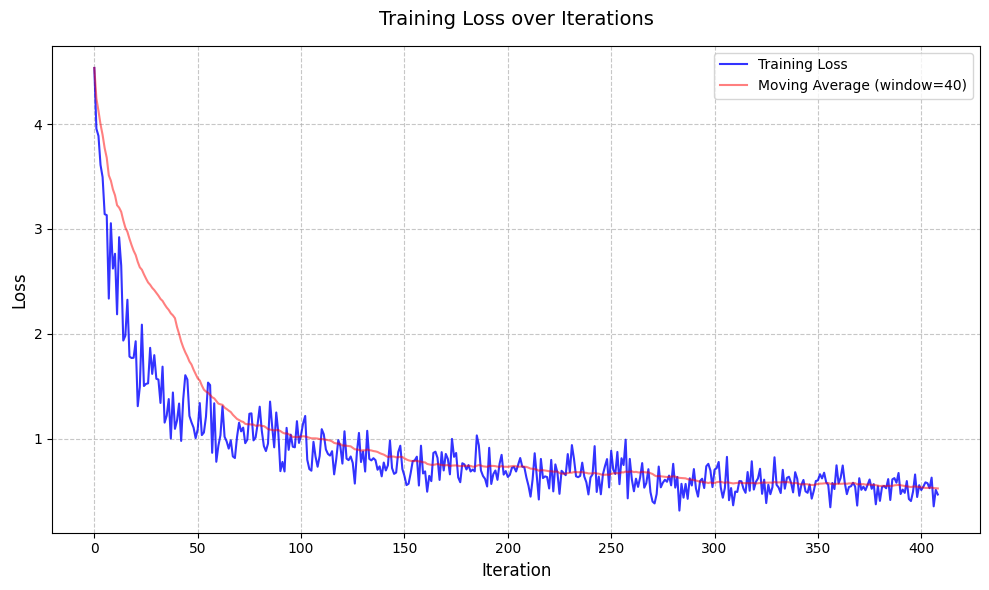

In [55]:
def plot_training_loss(lossi):
    # Convert tensor losses to numpy array
    losses = [loss.detach().numpy() for loss in lossi]

    # Create figure and axis
    plt.figure(figsize=(10, 6))

    # Plot the loss values
    plt.plot(range(len(losses)), losses, 'b-', alpha=0.8, label='Training Loss')

    # Customize the plot
    plt.title('Training Loss over Iterations', fontsize=14, pad=15)
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

    # If you want to add a trend line (moving average)
    window_size = min(100, len(losses)//10)  # Adjust window size based on data length
    if window_size > 1:
        moving_avg = [sum(losses[max(0, i-window_size):i])/min(i, window_size)
                     for i in range(1, len(losses)+1)]
        plt.plot(range(len(moving_avg)), moving_avg, 'r-', alpha=0.5,
                label=f'Moving Average (window={window_size})')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Use the function
plot_training_loss(lossi)

In [ ]:
#SORT OF THE THING!!